# Generate Sentinel 2 chips

## Data generation

Steps:

The code for calculating the image chips is implemented the Jupyter Notebook *01.03-bm-chips-s2-planetary-computer-code*. This needs to run in Microsfts Planetary Computer.

A longer version of the code with an appendix showing the development process can be found [here](https://github.com/benmack/PlanetaryComputerNotebooks/blob/main/Calculate%20temporal%20statistical%20metrics%20from%20cloud-masked%20Sentinel%202%20data%20on%20small%20areas%20(image%20chips).ipynb)

Input data / dependencies:
* *data/intermediate/target/sol_chem_pnts_horizons_africa_chip_geometries.gpkg*

Output data:
* *data\intermediate\chips\s2_metrics_p*
  * */data/{olc_id}.nc*: netcdf file with percentiles and mid 50 and mid 80 ranges
  * */metadata_s2_scenes/{olc_id}.csv*: metadata file listing the scenes found by the query and the scenes used to calculate the metrics, where the column *unique_metrics* is `True` 

## Read chip data

In [1]:
import pandas as pd
import xarray as xr

In [4]:
basedir_chips = '../data/intermediate/chips/s2_metrics_p'
olc_id = '7C28GHFX+PFH'
filename_nc = f"{basedir_chips}/data/{olc_id}.nc"
filename_s2_scenes = f"{basedir_chips}/metadata_s2_scenes/{olc_id}.csv"


### Metadata - Sentinel 2 scenes

For each chip there is a metadata file containing information about the Sentinel 2 scenes 

* queried
* used to generate the metrics ()


In [5]:
s2_scenes = pd.read_csv(filename_s2_scenes)
s2_scenes.head()

,id,geometry,cloud_cover,mission,product_level,datatake_sensing_start,relative_orbit,tile,product_discriminator,date,chip_id,unique_acquisitions
0,S2A_MSIL2A_20191228T111451_R137_T28PFS_2020100...,"POLYGON ((-14.085114 10.85412139, -13.080841 1...",0.001042,S2A,MSIL2A,20191228T111451,R137,T28PFS,20201003T103031,2019-12-28,22015,True
1,S2B_MSIL2A_20191223T111359_R137_T28PFS_2020100...,"POLYGON ((-14.085114 10.85412139, -13.080841 1...",0.091051,S2B,MSIL2A,20191223T111359,R137,T28PFS,20201003T084707,2019-12-23,22015,True
2,S2A_MSIL2A_20191218T111451_R137_T28PFS_2020100...,"POLYGON ((-14.085114 10.85412139, -13.080841 1...",0.159067,S2A,MSIL2A,20191218T111451,R137,T28PFS,20201003T062751,2019-12-18,22015,True
3,S2B_MSIL2A_20191213T111349_R137_T28PFS_2020100...,"POLYGON ((-14.085114 10.85412139, -13.080841 1...",0.002236,S2B,MSIL2A,20191213T111349,R137,T28PFS,20201003T043530,2019-12-13,22015,True
4,S2B_MSIL2A_20191203T111329_R137_T28PFS_2020100...,"POLYGON ((-14.0850999 10.85412139, -13.0808285...",1.030292,S2B,MSIL2A,20191203T111329,R137,T28PFS,20201003T001902,2019-12-03,22015,True


In [6]:
### Sentinel 2 percentile and mid range metrics

ds = xr.open_dataset(filename_nc)
ds

<xarray.Dataset>
Dimensions:      (time_period: 2, y: 129, x: 129, metric: 7)
Coordinates:
  * time_period  (time_period) object 'season_1' 'season_2'
  * x            (x) float64 6.743e+05 6.743e+05 ... 6.756e+05 6.756e+05
  * y            (y) float64 1.164e+06 1.164e+06 ... 1.163e+06 1.163e+06
  * metric       (metric) object 'p010' 'p025' 'p050' ... 'pmid50' 'pmid80'
    spatial_ref  int64 ...
Data variables:
    B02          (time_period, y, x, metric) uint16 ...
    B04          (time_period, y, x, metric) uint16 ...
    B8A          (time_period, y, x, metric) uint16 ...
    B09          (time_period, y, x, metric) uint16 ...
    B11          (time_period, y, x, metric) uint16 ...
    B12          (time_period, y, x, metric) uint16 ...

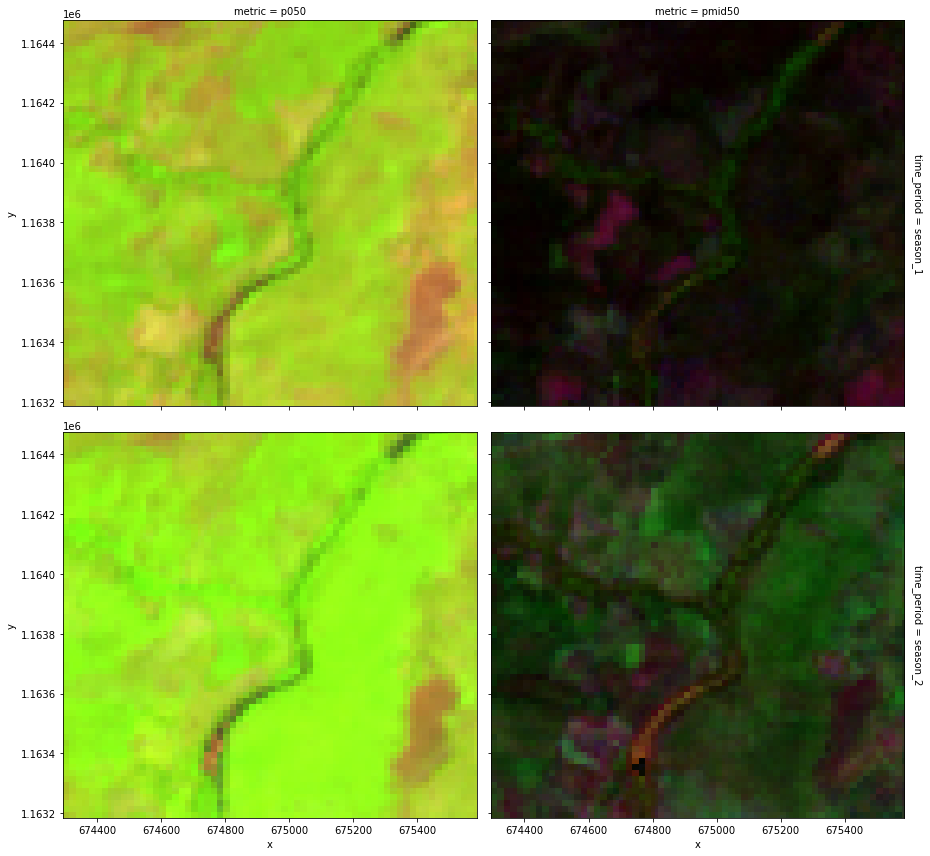

In [7]:
fcc = ds[["B11", "B8A", "B04"]].sel(metric=['p050', 'pmid50']).to_array().rename({'variable': 'band'})
fcc.plot.imshow(row="time_period", col='metric', rgb="band", robust=True, size=6)